## Objective for this Notebook
1. Define Several Neural Network, Criterion function, Optimizer.
2. Test Sigmoid,Tanh and Relu.
3. Analyse Results.

In [1]:
# Import the libraries we need for this lab
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F

## Neural Network Module and Training Function

In [13]:
# Create the model class using sigmoid as the activation function
class Net(nn.Module):

  # Constructor
  def __init__(self, D_in, H1, H2, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  # Prediction
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x

In [3]:
# Create the model class using Tanh as a activation function
class NetTanh(nn.Module):

  # Constructor
  def __init__(self, D_in, H1, H2, D_out):
    super(NetTanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  # Prediction
  def forward(self, x):
    x = torch.tanh(self.linear1(x))
    x = torch.tanh(self.linear2(x))
    x = self.linear3(x)
    return x


In [17]:
# Create the model class using Relu as a activation function
class NetRelu(nn.Module):

  # Constructor
  def __init__(self, D_in, H1, H2, D_out):
    super(NetRelu, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  # Prediction
  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [5]:
# Train the model
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
  i = 0
  useful_stuff = {'training_loss': [], 'validation_accuracy': []}
  for epoch in range(epochs):
    for i, (x, y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1, 28*28))
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
    useful_stuff['training_loss'].append(loss.item())

    correct = 0
    for x, y in validation_loader:
      yhat = model(x.view(-1, 28*28))
      _, label = torch.max(yhat, 1)
      correct += (label == y).sum().item()
    accuracy = 100 * (correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  return useful_stuff

## Make Some Data

In [6]:
# Create the training dataset
train_dataset = dsets.MNIST(root='./data', download=True, train=True, transform=transforms.ToTensor())
# Create the validation dataset
validation_dataset = dsets.MNIST(root='./data', download=True, train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.09MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.17MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
# Create the criterion function
criterion = nn.CrossEntropyLoss()

In [8]:
# Create the training data loader and validation data loader object
train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

## Define Neural Network, Criterion function, Optimizer and Train the Model

In [9]:
# Set the parameters for create the model
input_dim = 28*28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [10]:
# Set the number of iterations
cut_epochs = 10

## Test Sigmoid ,Tanh and Relu

In [14]:
# Train the model with sigmoid function
learning_rate = 0.01
model_sigmoid = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=learning_rate)
training_results_sigmoid = train(model_sigmoid, criterion, train_loader, validation_loader, optimizer, epochs=cut_epochs)

In [15]:
# Train the model with tanh function
learning_rate = 0.01
model_tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=learning_rate)
training_results_tanh = train(model_tanh, criterion, train_loader, validation_loader, optimizer, epochs=cut_epochs)

In [18]:
# Train the model with ReLU function
learning_rate = 0.01
model_relu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_relu.parameters(), lr=learning_rate)
training_results_relu = train(model_relu, criterion, train_loader, validation_loader, optimizer, epochs=cut_epochs)

## Analyze Results

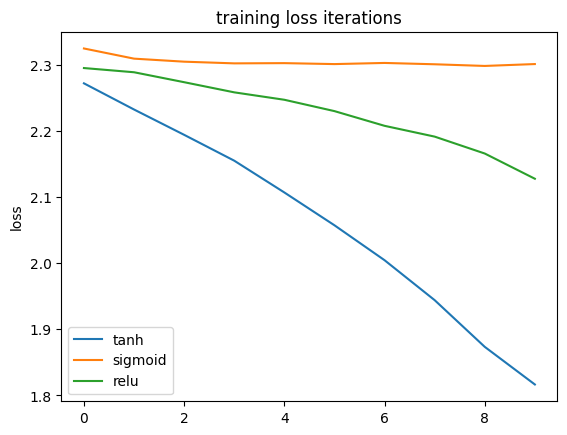

In [19]:
# Compare the training loss
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results_sigmoid['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

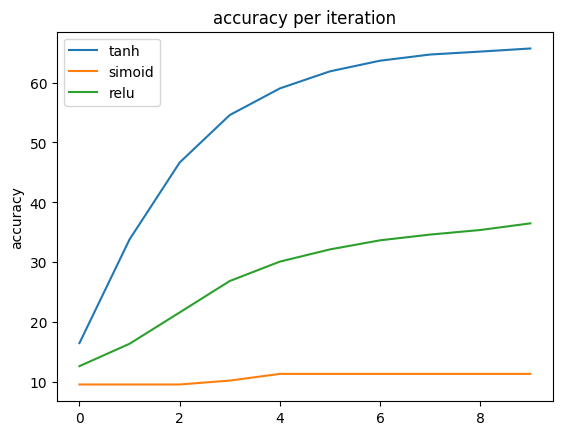

In [21]:
# Compare the validation loss
plt.plot(training_results_tanh['validation_accuracy'], label='tanh')
plt.plot(training_results_sigmoid['validation_accuracy'], label='simoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu')
plt.ylabel('accuracy')
plt.title('accuracy per iteration')
plt.legend()